In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver2D as s2

## Mesh creation

In [2]:
# mesh = BoxMesh(Point(0, 0, 0), Point(1, 1, 1), 10, 10, 10)
mesh = UnitCubeMesh(10, 10, 10)

## Test Case


In [3]:
m0 = 1e-3
dt = 0.5
T = 300
save_interval = 2
times = [] #[0,7/dt,14/dt,21/dt,28/dt]
doses = [] #10*np.ones_like(times)  
V = FunctionSpace(mesh,"P",2)
# n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma) - x[0]*x[0]/(2*sigma_x*sigma_x) - x[1]*x[1]/(2*sigma_x*sigma_x))",
#                 m0 = m0,s0 = 0.5,sigma=sqrt(0.08),sigma_x = sqrt(0.008),degree=2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,sigma=sqrt(0.02),degree=2)
n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/m01e-3_T300_mesh10"

solver = s2.Solver2D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass,phi_vect = solver.solve()


time=0: 
Solving linear variational problem.
iter=1: norm=0.00144709
Solving linear variational problem.
iter=2: norm=2.3205e-06
Solving linear variational problem.
time=0.5: 
Solving linear variational problem.
iter=1: norm=0.000294939
Solving linear variational problem.
time=1: 
Solving linear variational problem.
iter=1: norm=0.000369958
Solving linear variational problem.
time=1.5: 
Solving linear variational problem.
iter=1: norm=0.000462732
Solving linear variational problem.
time=2: 
Solving linear variational problem.
iter=1: norm=0.000577403
Solving linear variational problem.
time=2.5: 
Solving linear variational problem.
iter=1: norm=0.000718299
Solving linear variational problem.
time=3: 
Solving linear variational problem.
iter=1: norm=0.00089033
Solving linear variational problem.
time=3.5: 
Solving linear variational problem.
iter=1: norm=0.001099
Solving linear variational problem.
iter=2: norm=7.12303e-06
Solving linear variational problem.
time=4: 
Solving linear vari

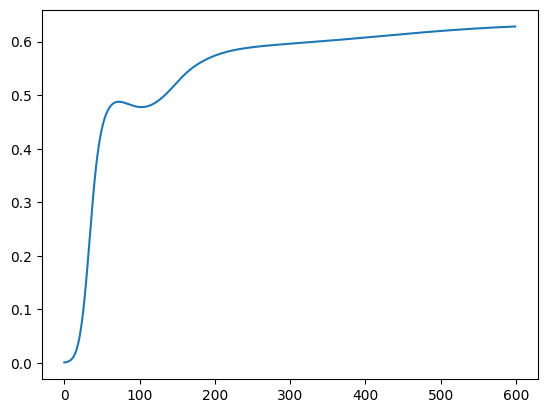

In [4]:
path_sol = "solutions/m01e-3_T300_mesh10"
mass = np.load(path_sol + '/mass.npy')
plt.plot(mass)
# path_sol2 = "solutions/prova_T100"
# mass2 = np.load(path_sol2 + '/mass.npy')
# plt.plot(mass2)

# plt.xlim([0,40])

In [ ]:
# oxygen level test case 1
c = Function(V)
cfile = XDMFFile(path_sol + '/c.xdmf')
ctot = []
for i in range(20):
    cfile.read_checkpoint(c,"c",i)
    print(c.vector().min())
    # ctot.append(assemble(c*dx))
# plt.plot(ctot)

0.21417188663631617 0.27909473189259826 0.5036076478091022


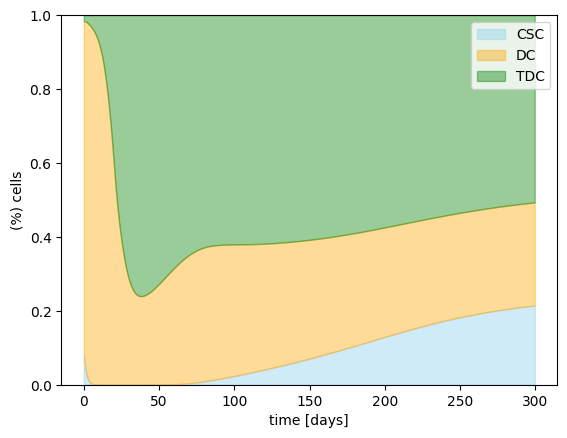

In [5]:
csc = np.load(path_sol + '/csc_mass.npy')
dc = np.load(path_sol + '/dc_mass.npy')
tdc = np.load(path_sol + '/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
time=np.arange(0,300,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
#plt.xlim([0,150])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])
print(csc[-1],dc[-1],tdc[-1])